---
title: "Homework 4 - Part 1: Lasso Linear Regerssion - Model 3 with Discussions"
subtitle: Beer Markets with Big Demographic Design
date: 2025-04-19
from: markdown+emoji
execute: 
  eval: false
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale # zero mean & one s.d.
from sklearn.linear_model import LassoCV, lasso_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#beer = pd.read_csv("https://bcdanl.github.io/data/beer_markets_xbeer_xdemog.zip")
#beer = pd.read_csv("https://bcdanl.github.io/data/beer_markets_xbeer_brand_xdemog.zip")
beer = pd.read_csv("https://bcdanl.github.io/data/beer_markets_xbeer_brand_promo_xdemog.zip")

In [3]:
X = beer.drop('ylogprice', axis = 1)
y = beer['ylogprice']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.values
y_test = y_test.values

In [5]:
# LassoCV with a range of alpha values
lasso_cv = LassoCV(n_alphas = 100,
                   alphas = None, # alphas=None automatically generate 100 candidate alpha values
                   cv = 5,
                   random_state=42,
                   max_iter=100000)

In [6]:
lasso_cv.fit(X_train.values, y_train)
#lasso_cv.fit(X_train.values, y_train.ravel())
print("LassoCV - Best alpha:", lasso_cv.alpha_)


LassoCV - Best alpha: 0.00022539867869301466


In [7]:
# Create a DataFrame including the intercept and the coefficients:
coef_lasso_beer = pd.DataFrame({
    'predictor': list(X_train.columns),
    'coefficient':  list(lasso_cv.coef_),
    'exp_coefficient': np.exp(  list(lasso_cv.coef_) )
})


# Evaluate
y_pred_lasso = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("LassoCV - MSE:", mse_lasso)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


LassoCV - MSE: 0.02863537005154527


In [8]:
coef_lasso_beer_n0 = coef_lasso_beer[coef_lasso_beer['coefficient'] != 0]

In [9]:
X_train.shape[1]

2655

In [10]:
coef_lasso_beer_n0.shape[0]

163

In [11]:
coef_lasso_beer_n0

,predictor,coefficient,exp_coefficient
0,logquantity,-0.136277,0.872601
1,container_CAN,-0.056243,0.945309
2,brandBUSCH_LIGHT,-0.072086,0.930451
4,brandMILLER_LITE,0.001853,1.001854
5,brandNATURAL_LIGHT,-0.457505,0.632861
...,...,...,...
2372,marketRURAL_WEST_VIRGINIA:npeople2,-0.032313,0.968203
2385,marketTAMPA:npeople2,0.018947,1.019127
2386,marketURBAN_NY:npeople2,0.001501,1.001502
2426,marketRALEIGH-DURHAM:npeople3,-0.005387,0.994627


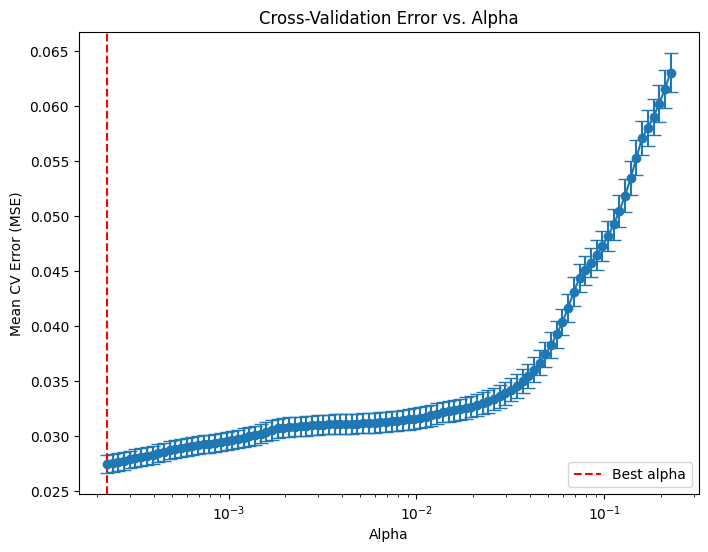

In [12]:
# Compute the mean and standard deviation of the CV errors for each alpha.
mean_cv_errors = np.mean(lasso_cv.mse_path_, axis=1)
std_cv_errors = np.std(lasso_cv.mse_path_, axis=1)

plt.figure(figsize=(8, 6))
plt.errorbar(lasso_cv.alphas_, mean_cv_errors, yerr=std_cv_errors, marker='o', linestyle='-', capsize=5)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean CV Error (MSE)')
plt.title('Cross-Validation Error vs. Alpha')
#plt.gca().invert_xaxis()  # Optionally invert the x-axis so lower alphas (less regularization) appear to the right.
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', label='Best alpha')
plt.legend()
plt.show()

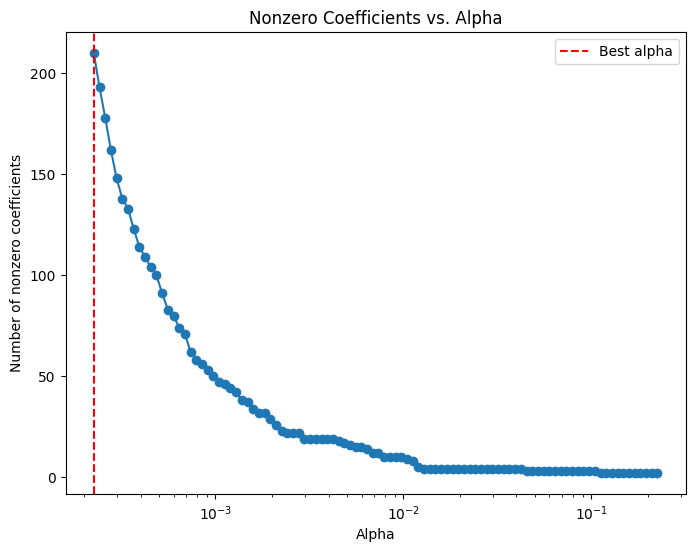

In [13]:
# Compute the coefficient path over the alpha grid that LassoCV used
alphas, coefs, _ = lasso_path(X_train, y_train,
                              alphas=lasso_cv.alphas_,
                              max_iter=100000)

# Count nonzero coefficients for each alpha (coefs shape: (n_features, n_alphas))
nonzero_counts = np.sum(coefs != 0, axis=0)

# Plot the number of nonzero coefficients versus alpha
plt.figure(figsize=(8,6))
plt.plot(alphas, nonzero_counts, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of nonzero coefficients')
plt.title('Nonzero Coefficients vs. Alpha')
#plt.gca().invert_xaxis()  # Lower alphas (less regularization) on the right
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', label='Best alpha')
plt.legend()
plt.show()

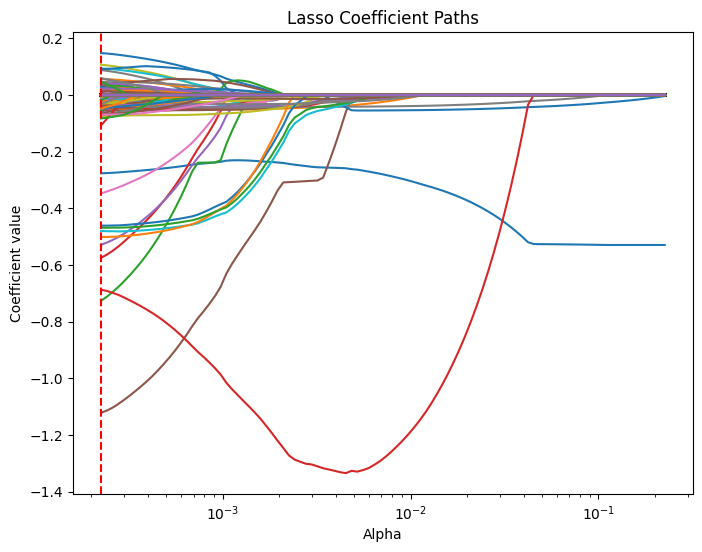

In [14]:
# Compute the lasso path. Note: we use np.log(y_train) because that's what you used in LassoCV.
alphas, coefs, _ = lasso_path(X_train, y_train,
                              alphas=lasso_cv.alphas_,
                              max_iter=100000)
plt.figure(figsize=(8, 6))
# Iterate over each predictor and plot its coefficient path.
for i, col in enumerate(X_train.columns):
    plt.plot(alphas, coefs[i, :], label=col)

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient value')
plt.title('Lasso Coefficient Paths')
#plt.gca().invert_xaxis()  # Lower alphas (weaker regularization) to the right.
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', label='Best alpha')
#plt.legend()
plt.show()

# Best Alphas

Model 1: 0.000082

Model 2: 0.000225

Model 3: 0.000225

# Sensitivity Estimates without Demographic Controls (Homework 2)

|             | Model 1 | Model 2                           | Model 3 (no Promo)               | Model 3 (with Promo)                                                 |
|-------------|--------:|-----------------------------------|----------------------------------|---------------------------------------------------------------------|
| **BUD**     |  -0.142 | -0.146                            | -0.140                           | -0.148 <br> = −0.140 − 0.008                                         |
| **BUSCH**   |  -0.142 | -0.159 <br> = −0.146 − 0.013       | -0.161 <br> = −0.140 − 0.021      | -0.122 <br> = −0.140 − 0.021 − 0.008 + 0.047                         |
| **COORS**   |  -0.142 | -0.146 <br> = −0.146 − 0          | -0.148 <br> = −0.140 − 0.008      | -0.119 <br> = −0.140 − 0.008 − 0.008 + 0.037                         |
| **MILLER**  |  -0.142 | -0.163 <br> = −0.146 − 0.017       | -0.163 <br> = −0.140 − 0.023      | -0.119 <br> = −0.140 − 0.023 − 0.008 + 0.052                         |
| **NATURAL** |  -0.142 | -0.094 <br> = −0.146 + 0.052        | -0.103 <br> = −0.140 + 0.037      | -0.040 <br> = −0.140 + 0.037 − 0.008 + 0.071                         |

# Sensitivity Estimates with Demographic Controls


|             | Model 1 | Model 2                           | Model 3 (no Promo)               | Model 3 (with Promo)                                                 |
|-------------|--------:|-----------------------------------|----------------------------------|---------------------------------------------------------------------|
| **BUD**     |  -0.1429 | -0.1408                            | -0.1363                           | -0.1403 <br> = −0.1363 + 0.0040                                         |
| **BUSCH**   |  -0.1429 | -0.1719 <br> = −0.1408 − 0.0311       | -0.1708 <br> = −0.1363 − 0.0345      | -0.1418 <br> = −0.1363 − 0.0345 + 0.0040 + 0.025                         |
| **COORS**   |  -0.1429 | -0.1414 <br> = −0.1408 − 0.0006          | -0.1365 <br> = −0.1363 − 0.0002      | -0.1355 <br> = −0.1363 − 0.0002 + 0.0040 - 0.0030                         |
| **MILLER**  |  -0.1429 | -0.1443 <br> = −0.1408 − 0.0035       | -0.1401 <br> = −0.1363 − 0.0038      | -0.1353 <br> = −0.1363 − 0.0038 + 0.0040 + 0.0008                         |
| **NATURAL** |  -0.1429 | -0.1113 <br> = −0.1408 + 0.0295        | -0.1105 <br> = −0.1363 + 0.0258      | -0.1058 <br> = −0.1363 + 0.0258 + 0.0040 + 0.0007                         |

# Sensitivity Visuals with & without Demographic Controls

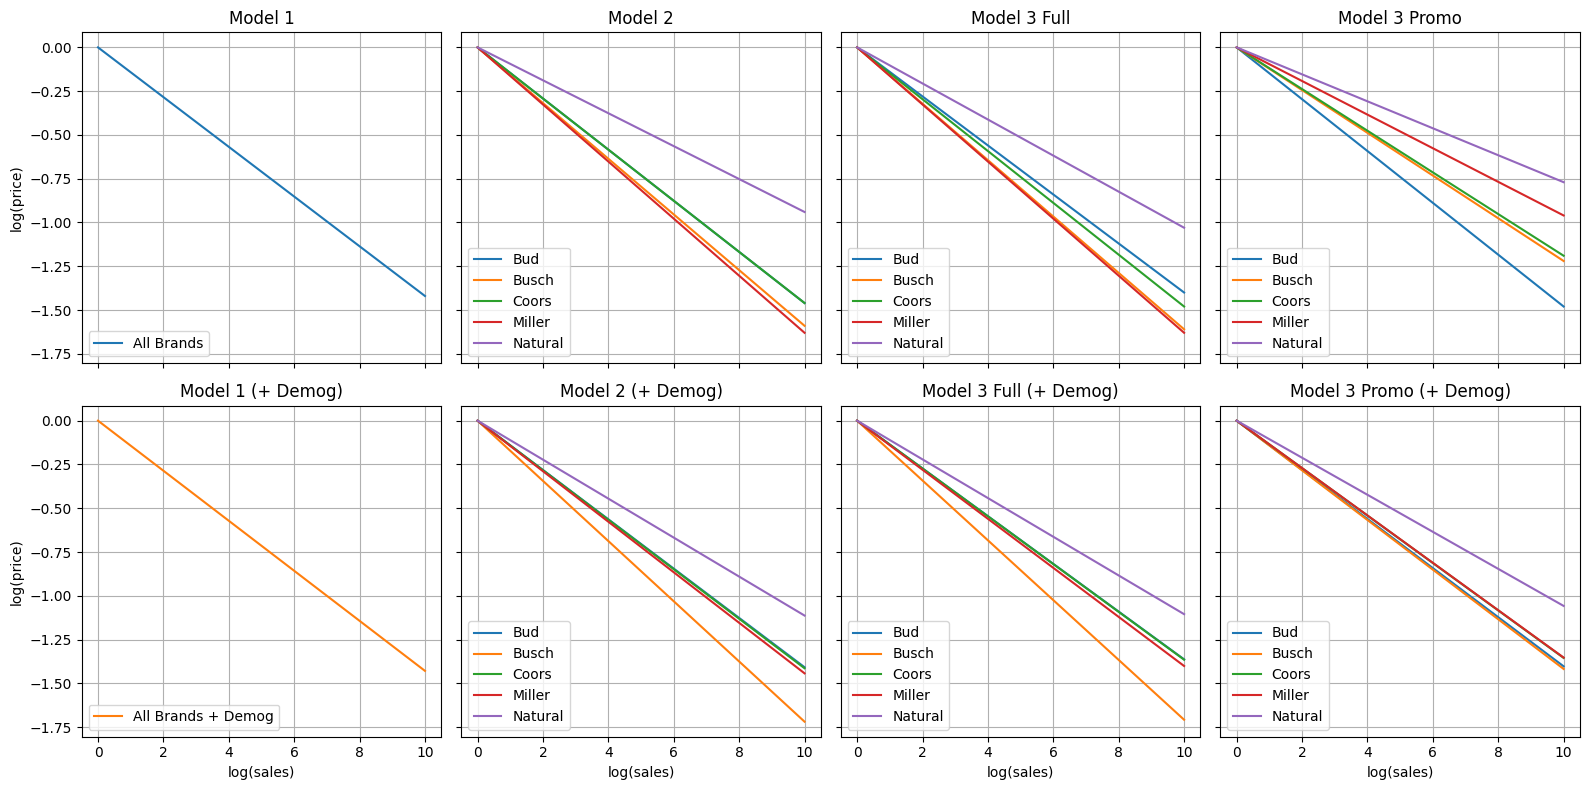

In [19]:
# Slopes (inverse elasticities)
model1_slope = -0.142
model2_slopes = {
    'Bud': -0.146,
    'Busch': -0.159,
    'Coors': -0.146,
    'Miller': -0.163,
    'Natural': -0.094
}
model3_full_slopes = {
    'Bud': -0.140,
    'Busch': -0.161,
    'Coors': -0.148,
    'Miller': -0.163,
    'Natural': -0.103
}
model3_promo_slopes = {
    'Bud': -0.148,
    'Busch': -0.122,
    'Coors': -0.119,
    'Miller': -0.096,
    'Natural': -0.077
}

model1_demog_slope = -0.1429
model2_demog_slopes = {
    'Bud': -0.1408,
    'Busch': -0.1719,
    'Coors': -0.1414,
    'Miller': -0.1443,
    'Natural': -0.1113
}
model3_demog_full_slopes = {
    'Bud': -0.1363,
    'Busch': -0.1708,
    'Coors': -0.1365,
    'Miller': -0.1401,
    'Natural': -0.1105
}
model3_demog_promo_slopes = {
    'Bud': -0.1403,
    'Busch': -0.1418,
    'Coors': -0.1355,
    'Miller': -0.1353,
    'Natural': -0.1058
}

# Create range of log(sales) values
x = np.linspace(0, 10, 100)

# Set up a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey=True)

# First row: models without demographics
# Model 1
ax = axes[0, 0]
ax.plot(x, model1_slope * x, color='tab:blue', label='All Brands')
ax.set_title('Model 1')
ax.set_ylabel('log(price)')
ax.grid(True)
ax.legend(loc='lower left')

# Model 2
ax = axes[0, 1]
for brand, slope in model2_slopes.items():
    ax.plot(x, slope * x, label=brand)
ax.set_title('Model 2')
ax.grid(True)
ax.legend(loc='lower left')

# Model 3 Full (No Promo)
ax = axes[0, 2]
for brand, slope in model3_full_slopes.items():
    ax.plot(x, slope * x, label=brand)
ax.set_title('Model 3 Full')
ax.grid(True)
ax.legend(loc='lower left')

# Model 3 Promo
ax = axes[0, 3]
for brand, slope in model3_promo_slopes.items():
    ax.plot(x, slope * x, label=brand)
ax.set_title('Model 3 Promo')
ax.grid(True)
ax.legend(loc='lower left')

# Second row: models with demographics
# Model 1 + Demog
ax = axes[1, 0]
ax.plot(x, model1_demog_slope * x, color='tab:orange', label='All Brands + Demog')
ax.set_title('Model 1 (+ Demog)')
ax.set_ylabel('log(price)')
ax.set_xlabel('log(sales)')
ax.grid(True)
ax.legend(loc='lower left')

# Model 2 + Demog
ax = axes[1, 1]
for brand, slope in model2_demog_slopes.items():
    ax.plot(x, slope * x, label=brand)
ax.set_title('Model 2 (+ Demog)')
ax.set_xlabel('log(sales)')
ax.grid(True)
ax.legend(loc='lower left')

# Model 3 Full + Demog
ax = axes[1, 2]
for brand, slope in model3_demog_full_slopes.items():
    ax.plot(x, slope * x, label=brand)
ax.set_title('Model 3 Full (+ Demog)')
ax.set_xlabel('log(sales)')
ax.grid(True)
ax.legend(loc='lower left')

# Model 3 Promo + Demog
ax = axes[1, 3]
for brand, slope in model3_demog_promo_slopes.items():
    ax.plot(x, slope * x, label=brand)
ax.set_title('Model 3 Promo (+ Demog)')
ax.set_xlabel('log(sales)')
ax.grid(True)
ax.legend(loc='lower left')

plt.tight_layout()
plt.show()

# How Demographic Controls Affect Price–Volume Sensitivity

Adding demographic covariates shifts the implied own‑price elasticities by varying amounts across models and brands.

---

## Model 1 (Common Elasticity)

| Specification        | Elasticity |
|:---------------------|-----------:|
| Without demographics | –0.1420    |
| With demographics    | –0.1429    |
| **Δ**                | **–0.0009** |
| **Effect**           | Slightly **more** elastic (negligible change) |

---

## Model 2 (Brand‑Specific Elasticities)

| Brand    | Without Demog | With Demog | Δ        | Effect                |
|:---------|--------------:|-----------:|---------:|:----------------------|
| Bud      | –0.1460       | –0.1408    | +0.0052  | Less elastic          |
| Busch    | –0.1590       | –0.1719    | –0.0129  | More elastic          |
| Coors    | –0.1460       | –0.1414    | +0.0046  | Less elastic          |
| Miller   | –0.1630       | –0.1443    | +0.0187  | Much less elastic     |
| Natural  | –0.0940       | –0.1113    | –0.0173  | More elastic          |

> **Interpretation:** Demographics slightly **dampen** sensitivity for Bud, Coors, and Miller but **increase** it for Busch and Natural.

---

## Model 3 Full‑Price (No Promo)

| Brand    | Without Demog | With Demog | Δ        | Effect                |
|:---------|--------------:|-----------:|---------:|:----------------------|
| Bud      | –0.1400       | –0.1363    | +0.0037  | Less elastic          |
| Busch    | –0.1610       | –0.1708    | –0.0098  | More elastic          |
| Coors    | –0.1480       | –0.1365    | +0.0115  | Less elastic          |
| Miller   | –0.1630       | –0.1401    | +0.0229  | Much less elastic     |
| Natural  | –0.1030       | –0.1105    | –0.0075  | More elastic          |

> **Interpretation:** Similar pattern to Model 2; demographic controls modestly **increase** or **decrease** brand‑specific slopes.

---

## Model 3 Promotional‑Price

| Brand    | Without Demog | With Demog | Δ        | Effect                  |
|:---------|--------------:|-----------:|---------:|:------------------------|
| Bud      | –0.1480       | –0.1403    | +0.0077  | Less elastic            |
| Busch    | –0.1220       | –0.1418    | –0.0198  | More elastic            |
| Coors    | –0.1190       | –0.1355    | –0.0165  | More elastic            |
| Miller   | –0.0960       | –0.1353    | –0.0393  | Much more elastic       |
| Natural  | –0.0770       | –0.1058    | –0.0288  | More elastic            |

> **Interpretation:** Demographic adjustments have the **largest impact** here, especially increasing sensitivity for Miller and others.

---
## Summary
- **Model 1**: Virtually no change when demographics are added.
- **Models 2 & 3 without Promo**: Elasticities shift modestly by brand—some become slightly more price‑sensitive, others slightly less.
- **Model 3 Promo**: Most brands become notably **more** elastic once demographics are included. This implies that **consumer characteristics** play a key role in how promotions affect beer pricing.

# Test Set RMSE Comparison

| Model | RMSE (no demogs) | RMSE (with demogs) |
|:-----:|-----------------:|-------------------:|
| 1     |            0.167 |             0.0278 |
| 2     |            0.166 |             0.0290 |
| 3     |            0.165 |             0.0286 |



Including demographic controls dramatically lowers the prediction error for all three models, implying that adding demogs substantially improves prediction performance.  